# Trabalho 2

* Aluno : Gabriel Borin Macedo
* RA : 197201

## Descrição do trabalho
O objetivo deste trabalho é realizar uma série de __experimentos com métodos de limiarização global e local em imagens de testes no formato .pgm__.
Além disso, para cada método, queremos verificar qual é o __histograma da imagem antes de aplicar o método do treshold e a fração dos pixels pretos encontrados__

## Parte 0 : Definições de alguns conceitos
Para esta parte, será declarado conceitos que serão importantes para entendimento deste código

### Segmentação de um pixel

seja $x$, $y$ coordenadas de um _pixel_ em uma imagem, $T$ o valor de _threshold_ inteiro com $0 \le T \le 255$ e $p(x, y)$ o valor de cinza de um _pixel_ na coordenada $(x, y)$. Então, temos que o valor da máscara binária final $I_{m}$ será da forma
$$I_{m}(x, y) = \begin{cases}
             1 & \text{ se $p(x, y) > T$} \\
             0 & \text{ caso contrário}
   \end{cases}$$
neste caso, iremos considerar que se o **o pixel $p(x, y)$ é classificado como objeto (ou seja, o valor de pixel dele é branco) e caso contrário, ele será rotulado como preto (ou seja, o valor de pixel dele é preto)**

### _Pré-sets_ de alguns dados iniciais do _script_
Para esta parte, este notebook será inicializado com as bibliotecas para execução do código, criação de funções uteis para o _plot_ de funções e de informações úteis da imagem

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


def info_segment(img_mask: np.ndarray) -> tuple[int, int, float]:
    """
    função que realiza um print do valor máximo, mínimo da máscara e da porcentagem de pixels pretos na imagem

    :param img_mask: um numpy array que representa a imagem de entrada
    :return: retorna uma tupla com três elementos que representa respectivamente o número de pixels segmentado como pretos, o total de pixels da imagem e a porcentagem de pixels pretos em relação a imagem
    """
    # Contando a quantidade de pixels
    n_segmented_pixels = np.count_nonzero(img_mask == 0)
    img_total_pixels = img_mask.shape[0] * img_mask.shape[1]
    percent_segmented_pixels = n_segmented_pixels / img_total_pixels

    print("valor mínimo da máscara : {}".format(img_mask.min()))
    print("valor máximo da máscara : {}".format(img_mask.max()))

    print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                            img_total_pixels,
                                                                                            percent_segmented_pixels))

    return n_segmented_pixels, img_total_pixels, percent_segmented_pixels


def plot_figures_in_line(image: np.ndarray, mask: np.ndarray, thresh_min: int, title1: str = "",
                         title2: str = "", **kwargs: dict) -> None:
    """
    função que realiza o plot de uma imagem sem o treshold, o seu histograma, a máscara binária gerada e o histograma com o limiar de pixels segmentados com o threshold adotado

    :param image: um numpy array que representa a imagem de entrada
    :param mask: um numpy array que representa a máscara binária
    :param thresh_min: um valor inteiro que representa o valor T do treshold encontrado no método
    :param title1: uma string que presenta o título da primeira imagem para plotar (opcional)
    :param title2: uma string que presenta o título da segunda imagem para plotar (opcional)
    :param kwargs: um dicionário que contém as chaves "save_fig" que é uma string para salvar a imagem em um arquivo e "save_dir" com o diretório para ser salvo
    :return: None
    """
    if "save_fig" in kwargs.keys():
        save_fig_name = kwargs.pop("save_fig")
        save_dir = kwargs.pop("save_dir")

    else:
        save_fig_name = ""
        save_dir = ""

    fig, ax = plt.subplots(2, 2, figsize=(15, 15))
    ax[0, 0].imshow(image, cmap=plt.cm.gray)

    ax[0, 0].set_title(title1)

    ax[0, 1].hist(image.ravel(), bins=256)
    ax[0, 1].set_title("Histograma {}".format(title1))

    ax[1, 0].imshow(mask, cmap=plt.cm.gray)
    ax[1, 0].set_title(title2)

    ax[1, 1].hist(image.ravel(), bins=256)
    ax[1, 1].axvline(thresh_min, color='r')

    for a in ax[:, 0]:
        a.axis('off')
    if save_fig_name:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(save_dir + save_fig_name)

    plt.show()

### Carregamento das imagens de teste do programa
Nesta célula, serão carregado as imagens com extensão __.pgm__

In [2]:
img_baboon = cv2.imread("Imagens/baboon.pgm", -1)
img_fiducial = cv2.imread("Imagens/fiducial.pgm", -1)
img_retina = cv2.imread("Imagens/retina.pgm", -1)
img_sonnet = cv2.imread("Imagens/sonnet.pgm", -1)
img_wedge = cv2.imread("Imagens/wedge.pgm", -1)

## Parte 1 : Aplicação do método Global
Inicialmente, será definido a função do método global sendo

In [3]:
from skimage.filters import threshold_otsu


def global_method(img: np.ndarray) -> tuple[np.ndarray, int]:
    """

    :param img:
    :return:
    """
    threshold = threshold_otsu(img)
    binary_mask = (img > threshold).astype(img.dtype)
    return binary_mask, threshold

### Aplicação do **método global** nas imagens de exemplo
Agora, vamos aplicar o método nas imagens de exemplo, calcular o histograma da imagem original e encontrar a proporção de _pixels_ preto em relação a imagem original

#### Imagem _baboon_

 **Talves descrever algo do tipo de normalizar o contraste da imagem**

#### Calculando a máscara da imagem e a quantidade de pixels pretos

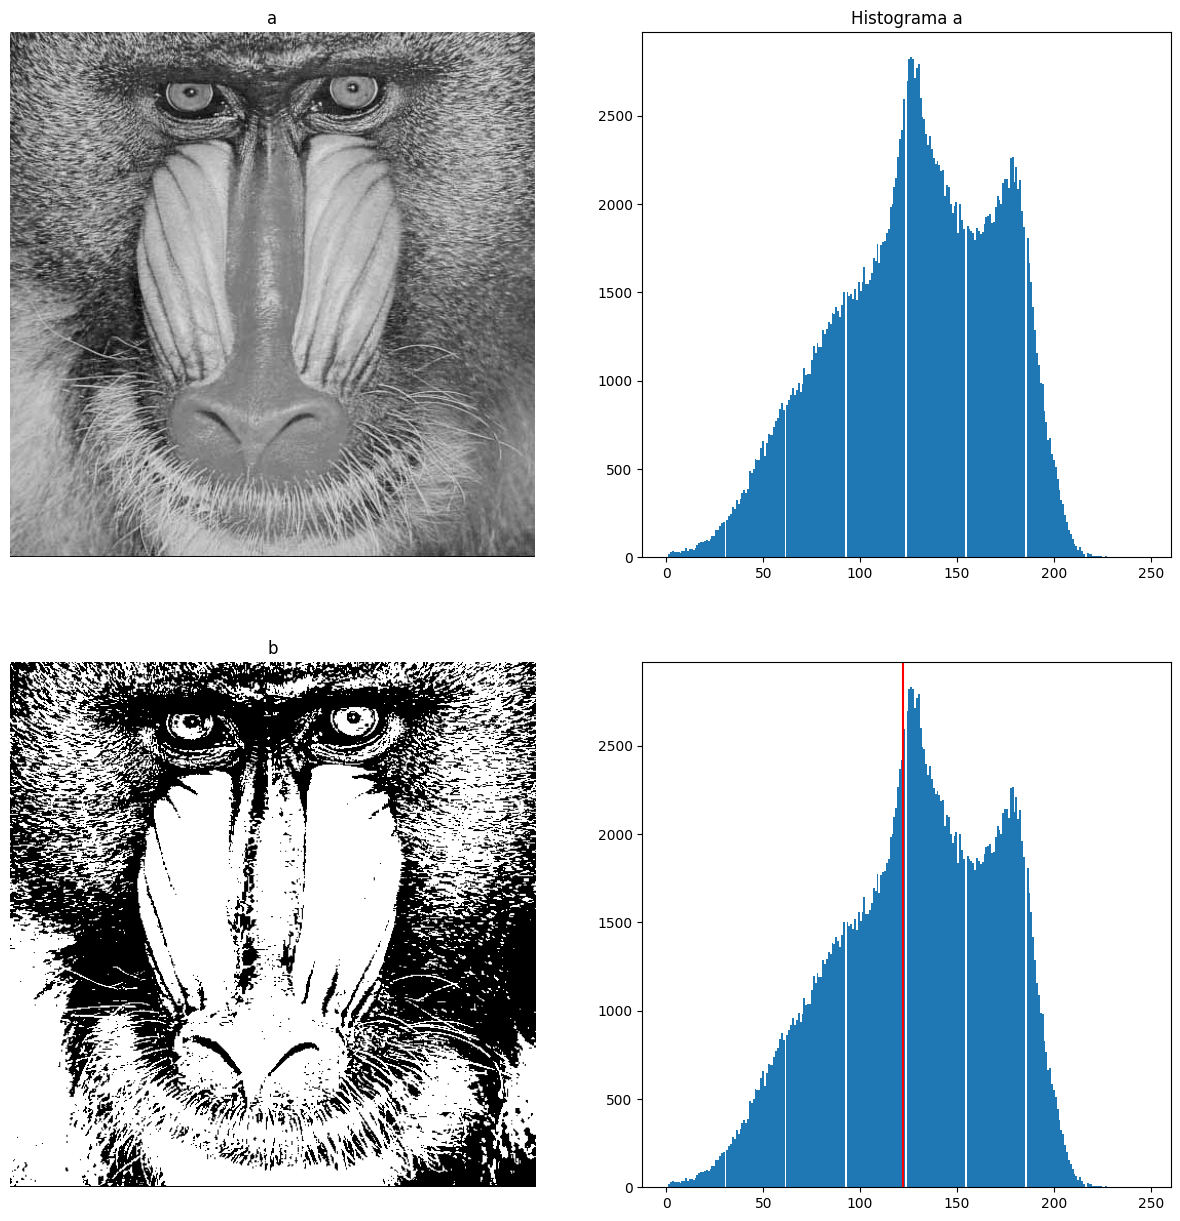

In [4]:
mask_baboon, t_baboon = global_method(img_baboon)
plot_figures_in_line(img_baboon, mask_baboon, t_baboon, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [5]:
_ = info_segment(mask_baboon)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 107215/262144 ~= 0.41 %


#### Imagem __fiducial__

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

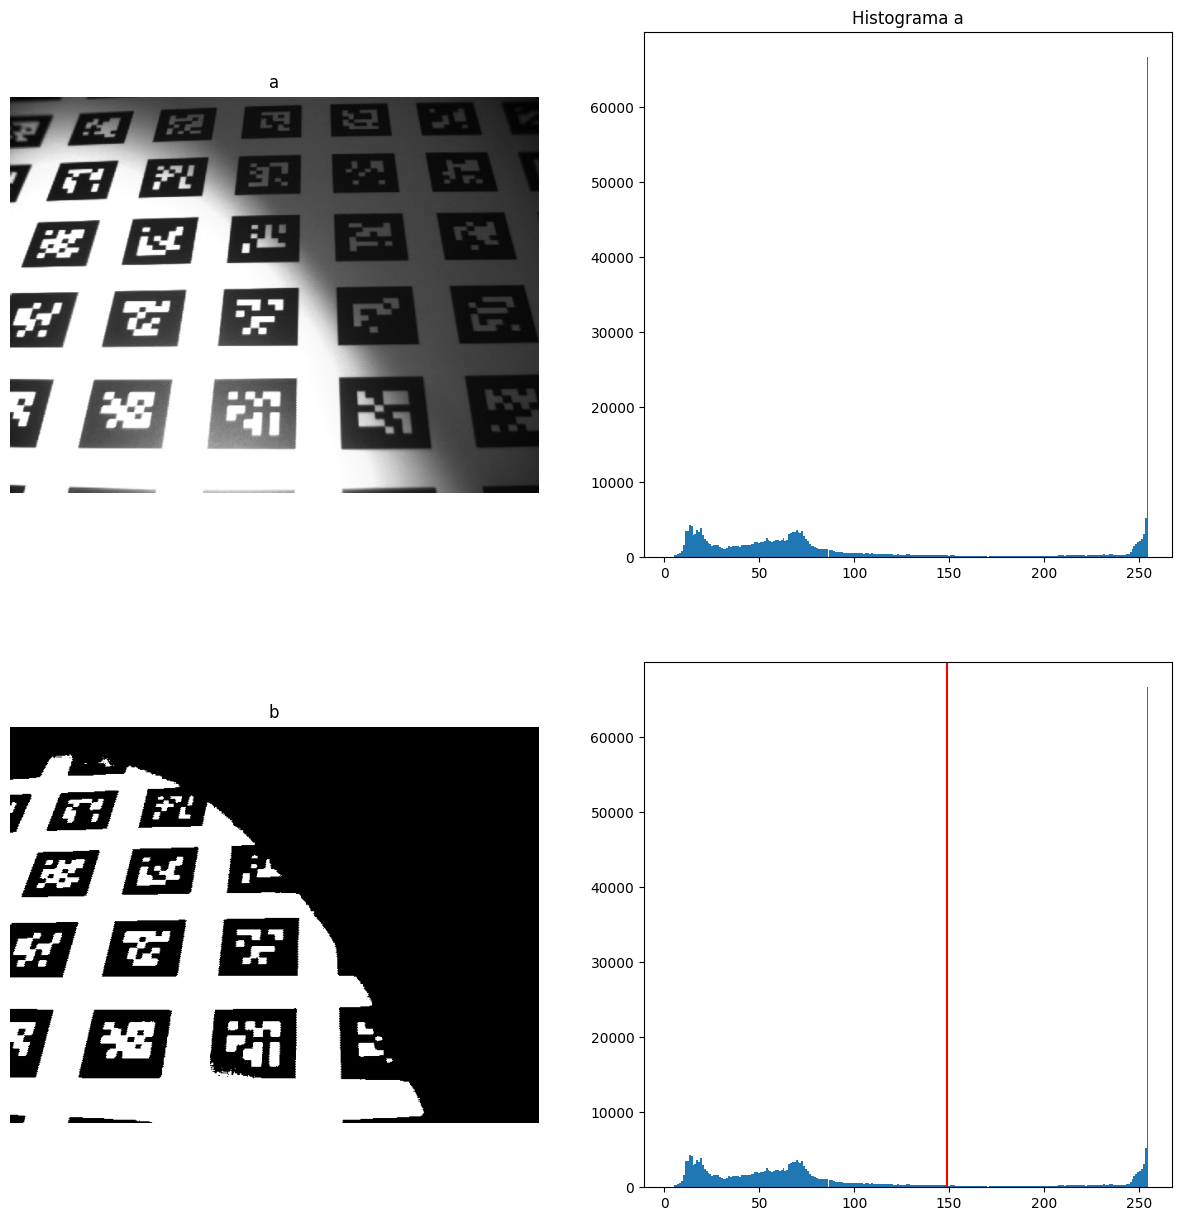

In [6]:
mask_fiducial, t_fiducial = global_method(img_fiducial)
plot_figures_in_line(img_fiducial, mask_fiducial, t_fiducial, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [7]:
_ = info_segment(mask_fiducial)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 197022/307200 ~= 0.64 %


#### Imagem __retina__

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

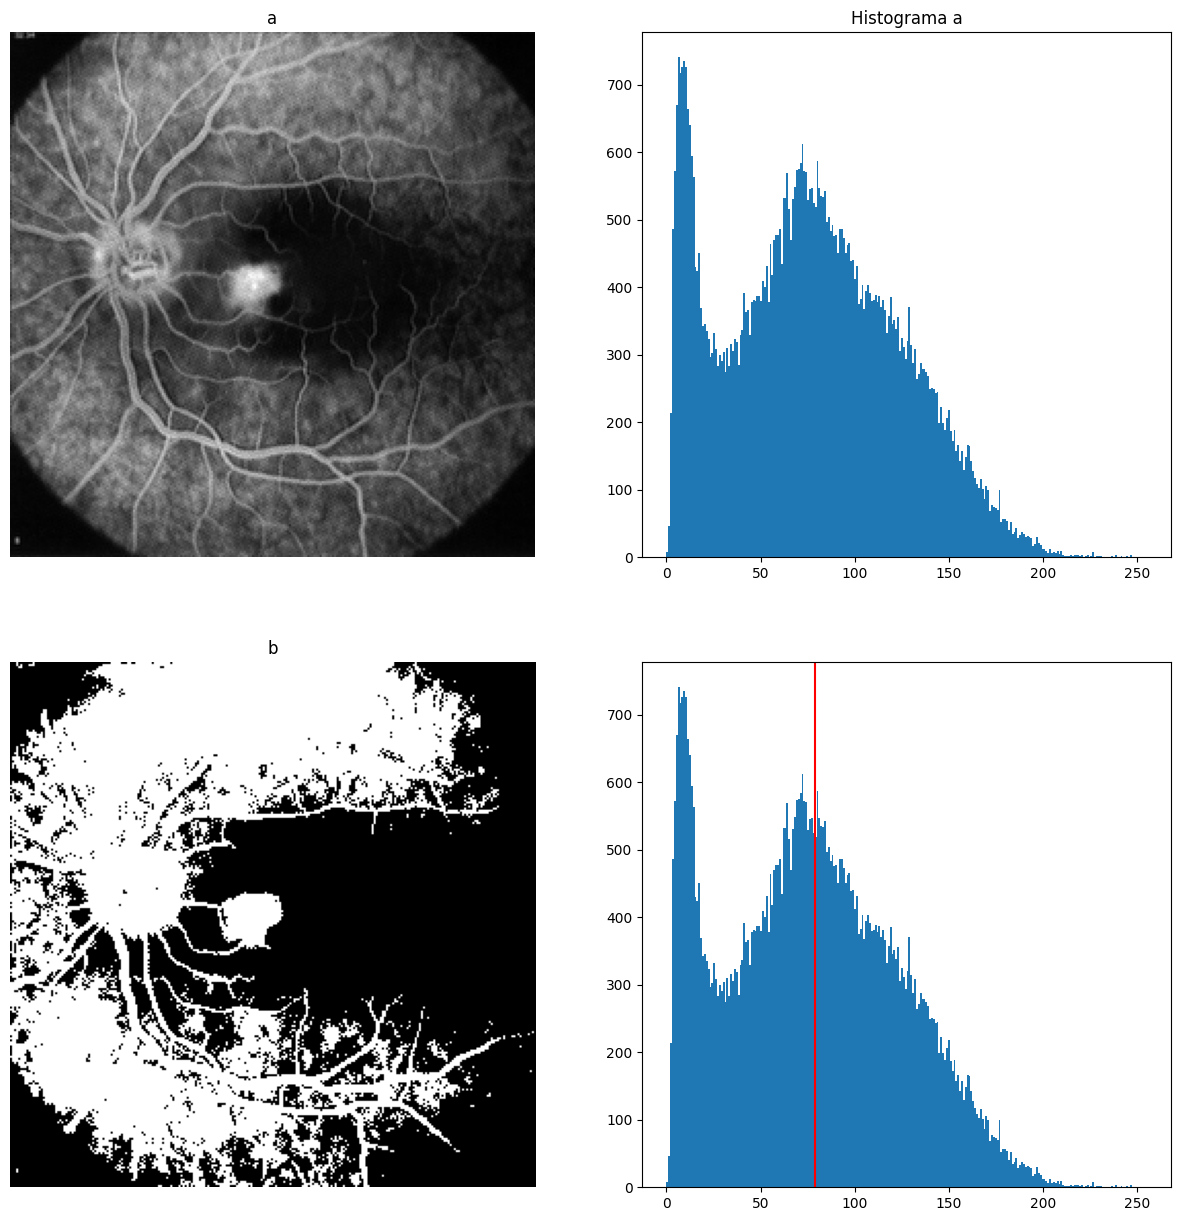

In [8]:
mask_retina, t_retina = global_method(img_retina)
plot_figures_in_line(img_retina, mask_retina, t_retina, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [9]:
_ = info_segment(mask_retina)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 35083/65536 ~= 0.54 %


#### Imagem __sonnet__

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

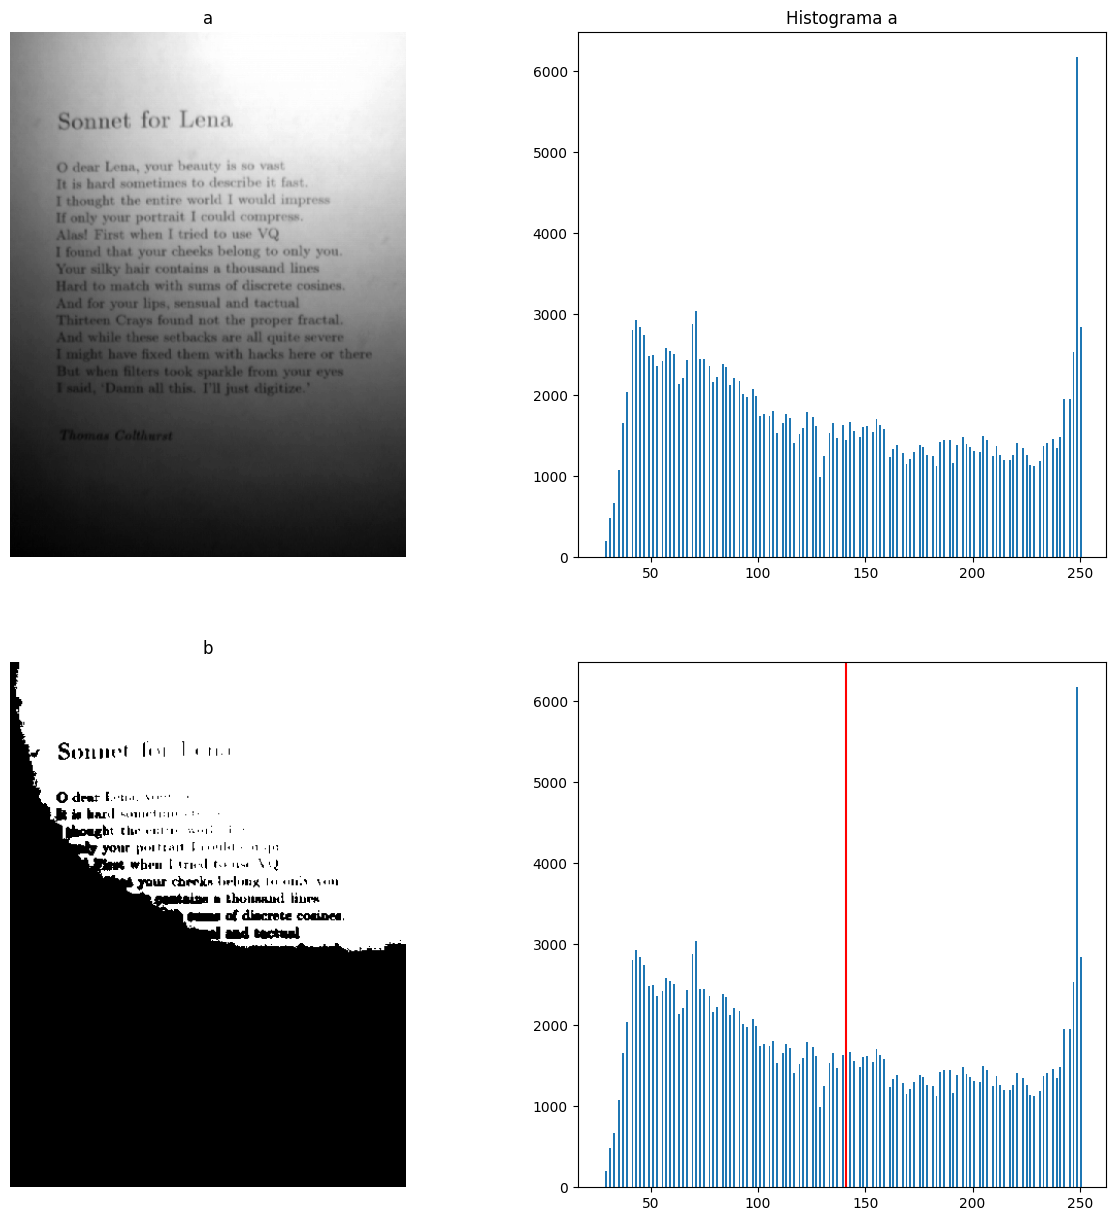

In [10]:
mask_sonnet, t_sonnet = global_method(img_sonnet)
plot_figures_in_line(img_sonnet, mask_sonnet, t_sonnet, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [11]:
_ = info_segment(mask_sonnet)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 111943/195840 ~= 0.57 %


#### Imagem __wedge__

##### Calculando

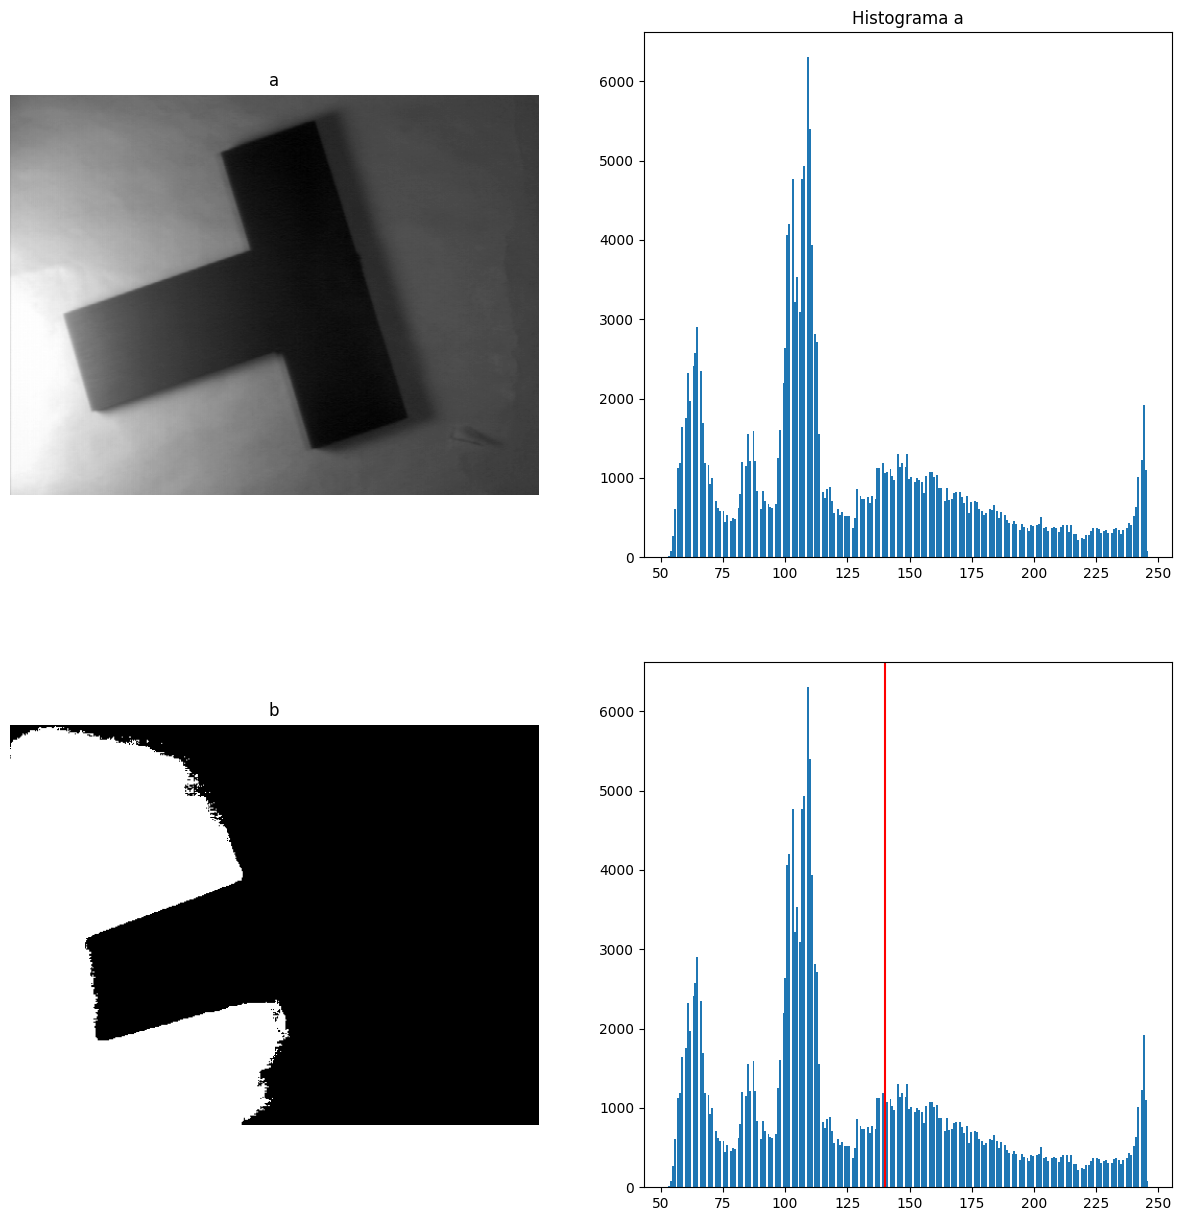

In [12]:
mask_wedge, t_wedge = global_method(img_wedge)
plot_figures_in_line(img_wedge, mask_wedge, t_wedge, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [13]:
_ = info_segment(mask_wedge)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 129238/194688 ~= 0.66 %


## Parte 2

In [14]:
from scipy.ndimage import generic_filter


def _bersen_threshold(img_block: np.ndarray) -> np.ndarray:
    """

    :param img_block:
    :return:
    """
    new_block = (img_block.max() + img_block.min()) / 2
    return new_block.astype(img_block.dtype)


def bersen(img: np.ndarray, n: int) -> np.ndarray:
    img_mask = np.zeros(shape=img.shape, dtype=img.dtype)
    threshold = generic_filter(img, _bersen_threshold, n)
    img_mask = np.where(img > threshold, 1, 0)
    return img_mask, (threshold.mean()).astype(img.dtype)

### Aplicação do **método de bérsen** nas imagens de exemplo
https://www.geeksforgeeks.org/mahotas-bersen()-local-thresholding/

#### Imagem __baboon__

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

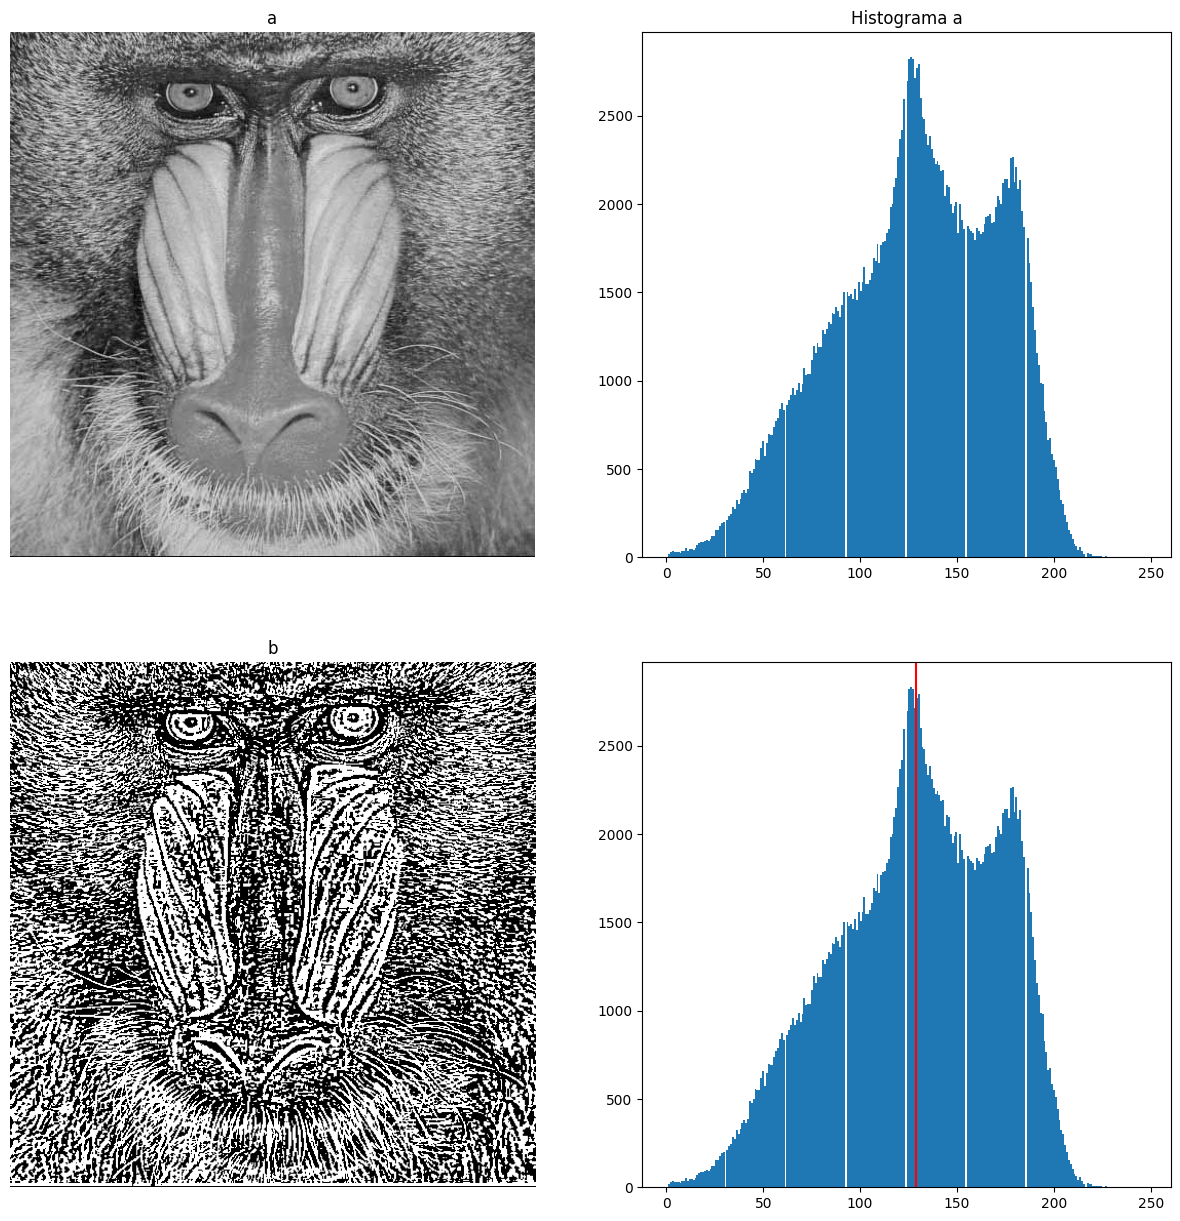

In [15]:
mask_baboon, t_baboon = bersen(img_baboon, 7)
plot_figures_in_line(img_baboon, mask_baboon, t_baboon, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [16]:
_ = info_segment(mask_baboon)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 135368/262144 ~= 0.52 %


##### Imagem __fiducial__

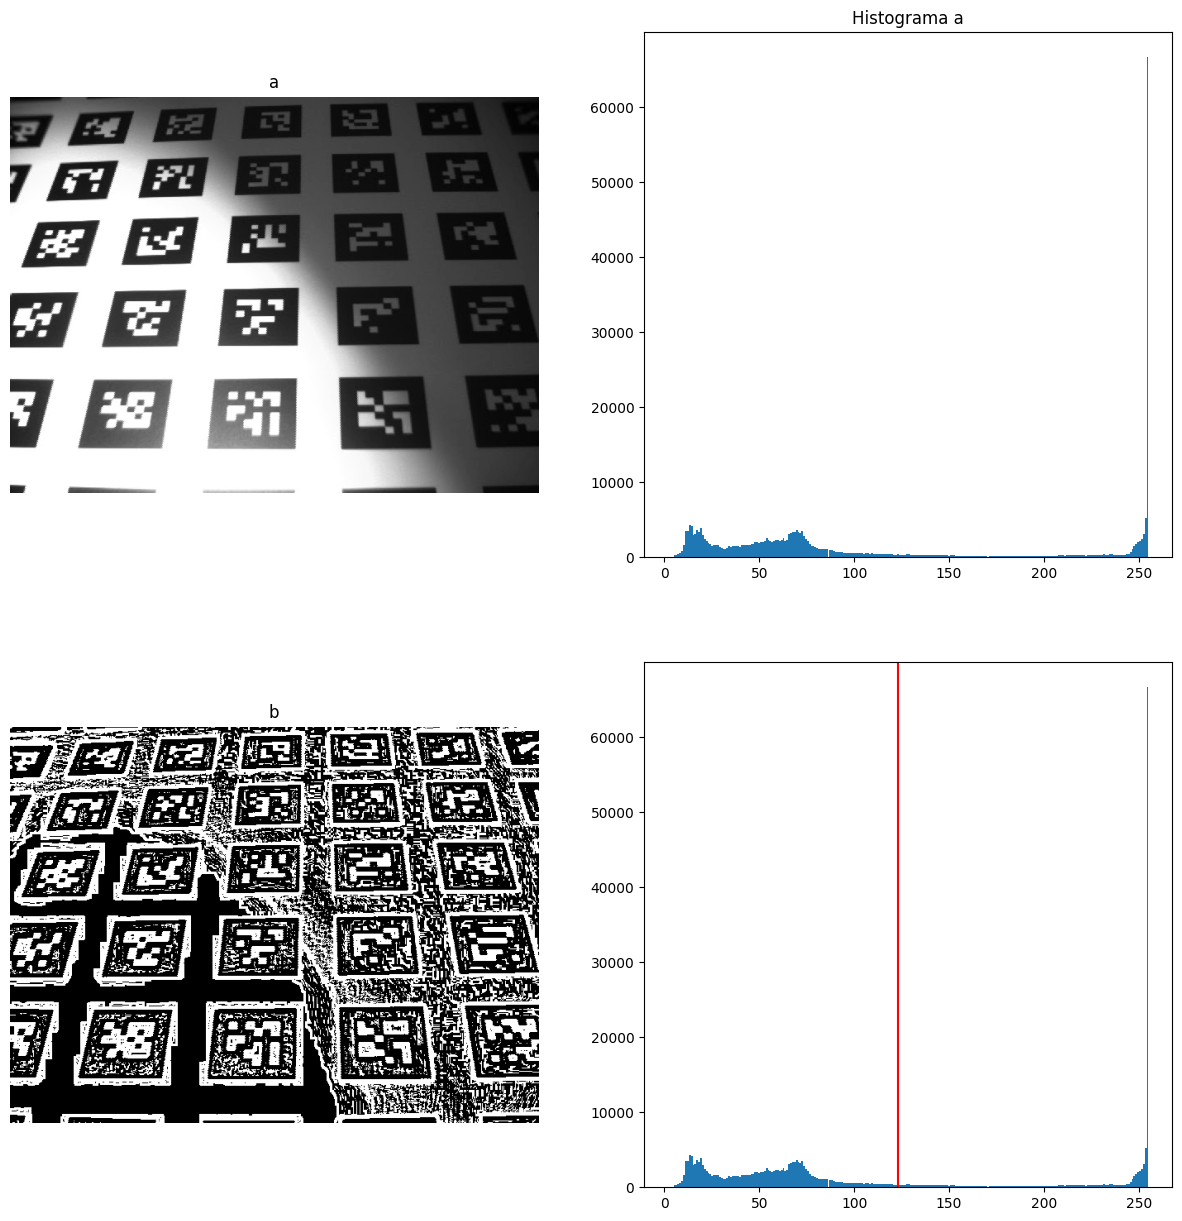

In [17]:
mask_fiducial, t_fiducial = bersen(img_fiducial, 7)
plot_figures_in_line(img_fiducial, mask_fiducial, t_fiducial, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [18]:
_ = info_segment(mask_fiducial)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 191735/307200 ~= 0.62 %


#### Imagem __retina__

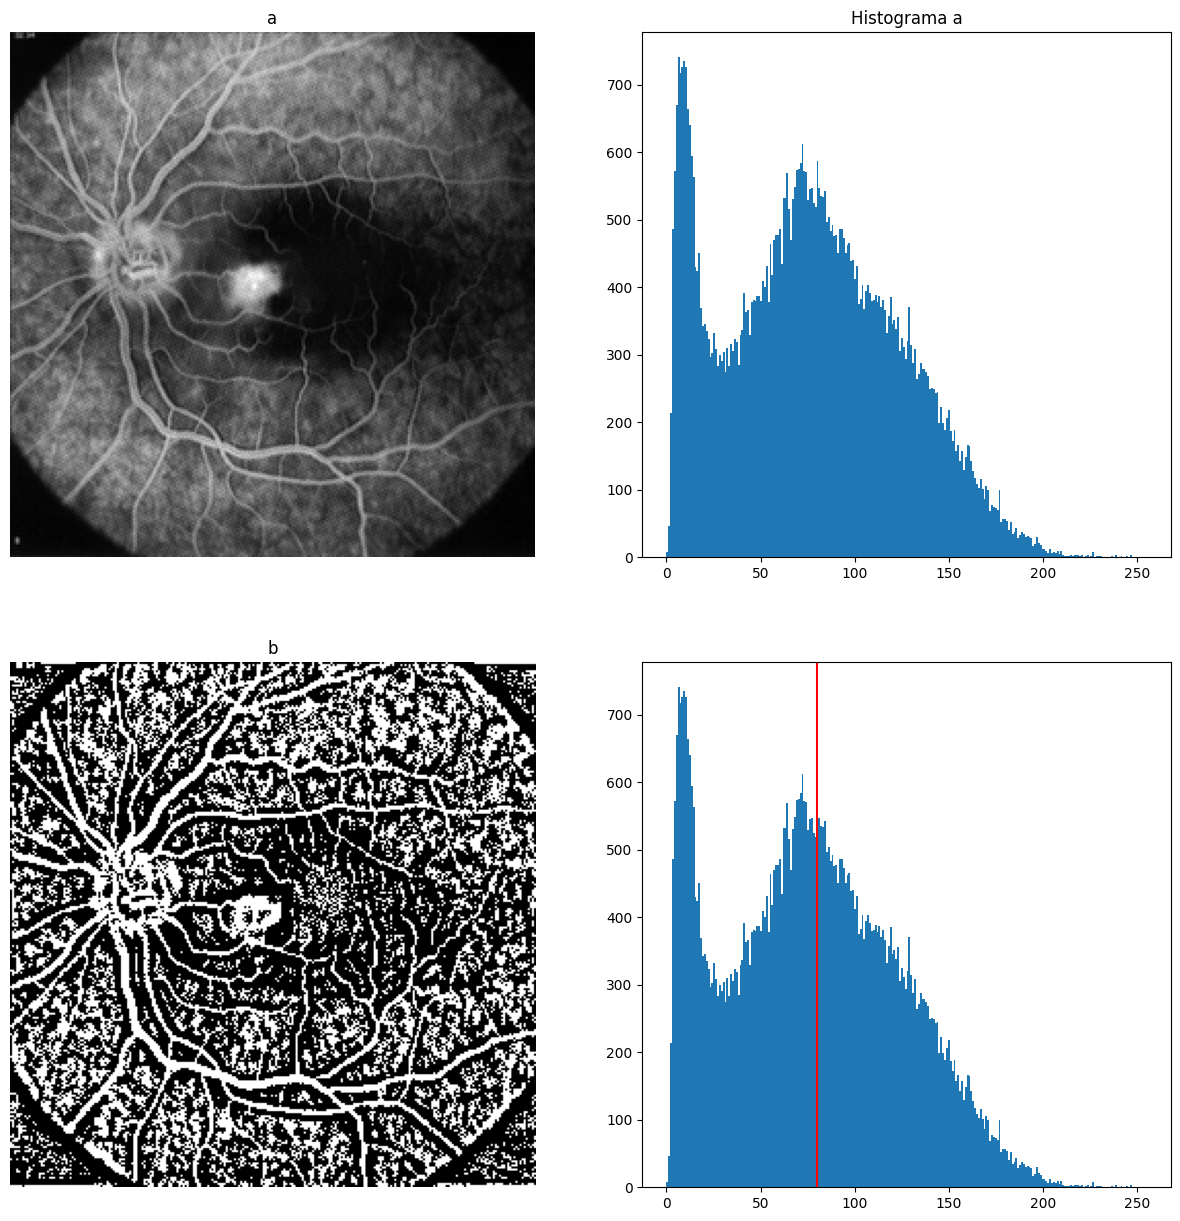

In [19]:
mask_retina, t_retina = bersen(img_retina, 7)
plot_figures_in_line(img_retina, mask_retina, t_retina, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [20]:
_ = info_segment(mask_retina)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 41300/65536 ~= 0.63 %


##### Imagem __sonnet__

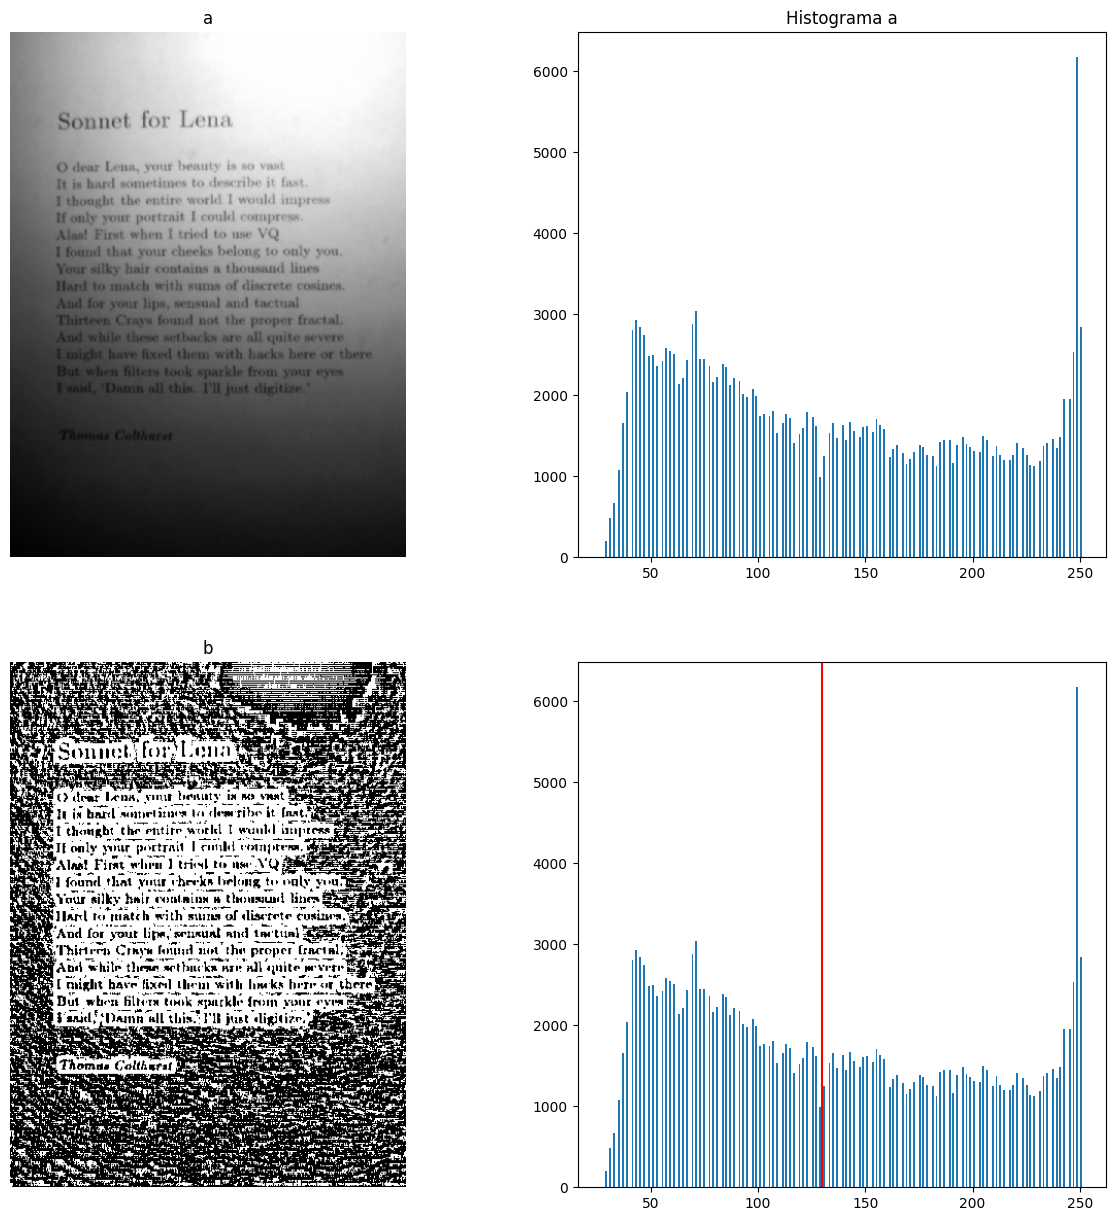

In [21]:
mask_sonnet, t_sonnet = bersen(img_sonnet, 7)
plot_figures_in_line(img_sonnet, mask_sonnet, t_sonnet, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [22]:
_ = info_segment(mask_sonnet)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 102008/195840 ~= 0.52 %


##### Imagem __wedge__

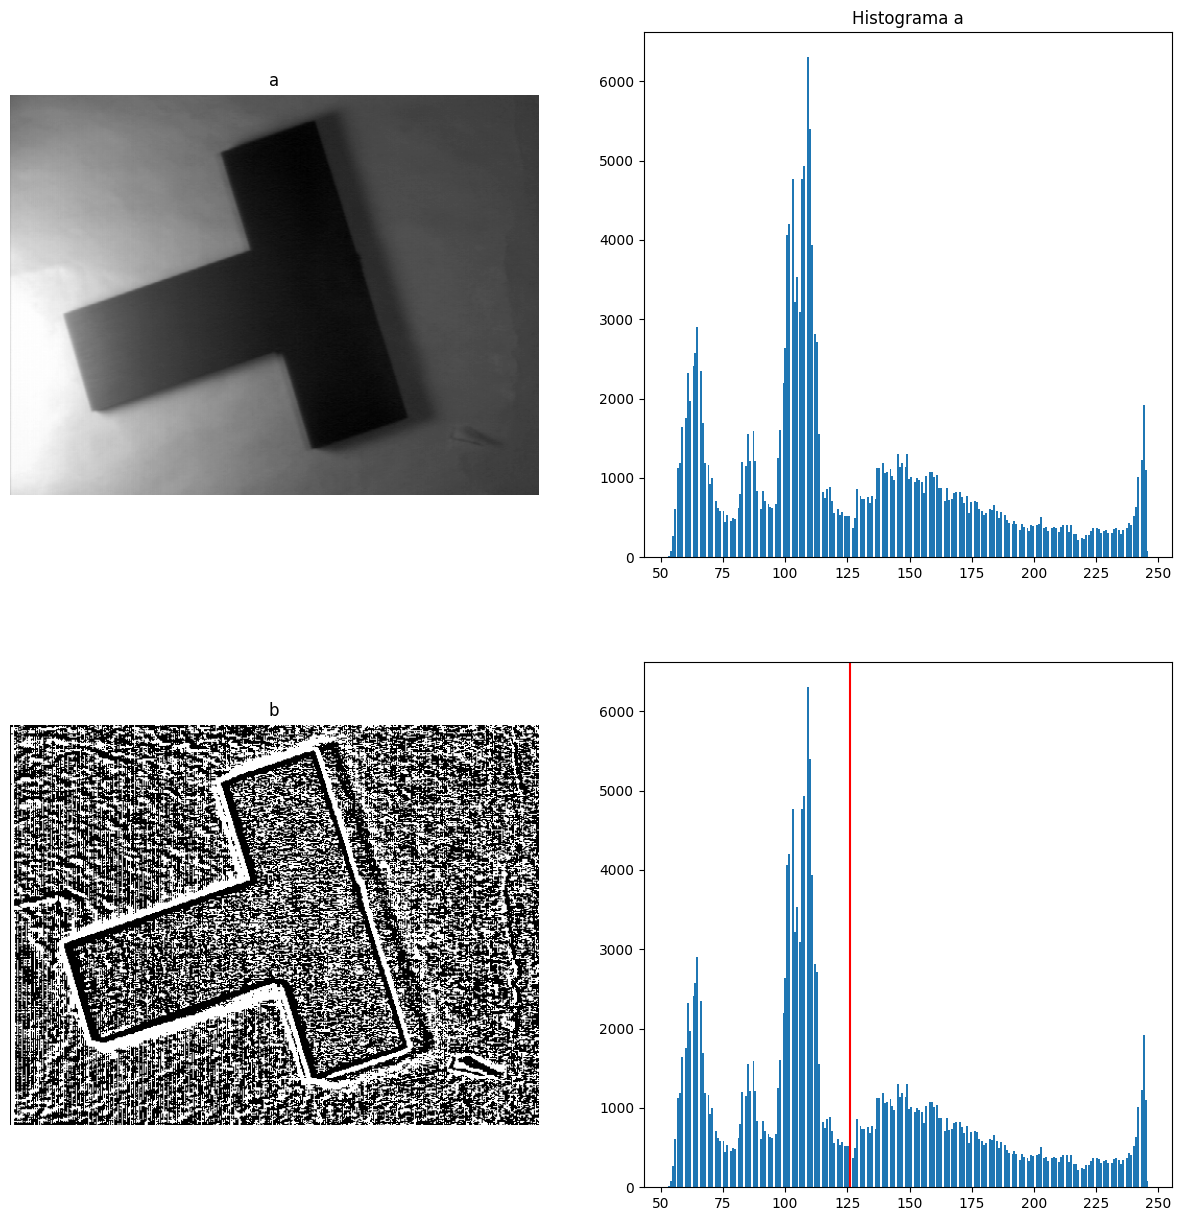

In [23]:
mask_wedge, t_wedge = bersen(img_wedge, 7)
plot_figures_in_line(img_wedge, mask_wedge, t_wedge, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [24]:
_ = info_segment(mask_wedge)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 111479/194688 ~= 0.57 %


# Parte 3 : Método de Niblack
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html

Agora, vamos criar a função para fazer isso

In [25]:
from skimage.filters import threshold_niblack


def niblack_treshold(img: np.ndarray, window_size: int, k: float) -> tuple[np.ndarray, float]:
    threshold = threshold_niblack(img, window_size, k)
    binary_mask = (img > threshold).astype(img.dtype)
    return binary_mask, threshold.mean()

## Imagem __baboon__

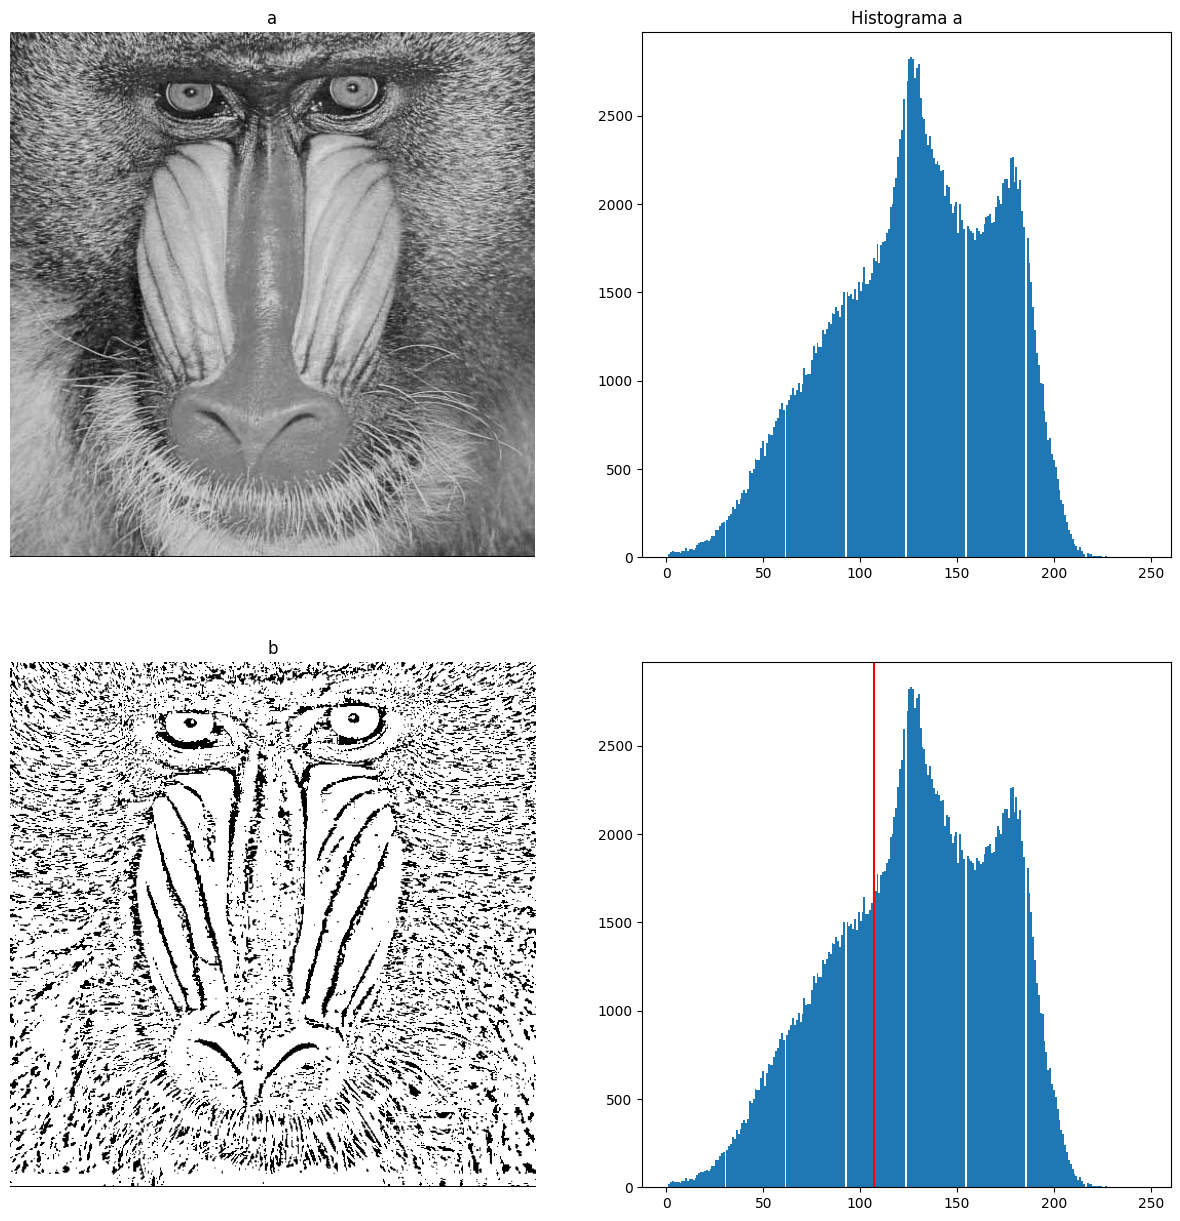

In [26]:
mask_baboon, t_baboon = niblack_treshold(img_baboon, 25, 0.8)

plot_figures_in_line(img_baboon, mask_baboon, t_baboon, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [27]:
_ = info_segment(mask_baboon)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 50436/262144 ~= 0.19 %


## Imagem __fiducial__

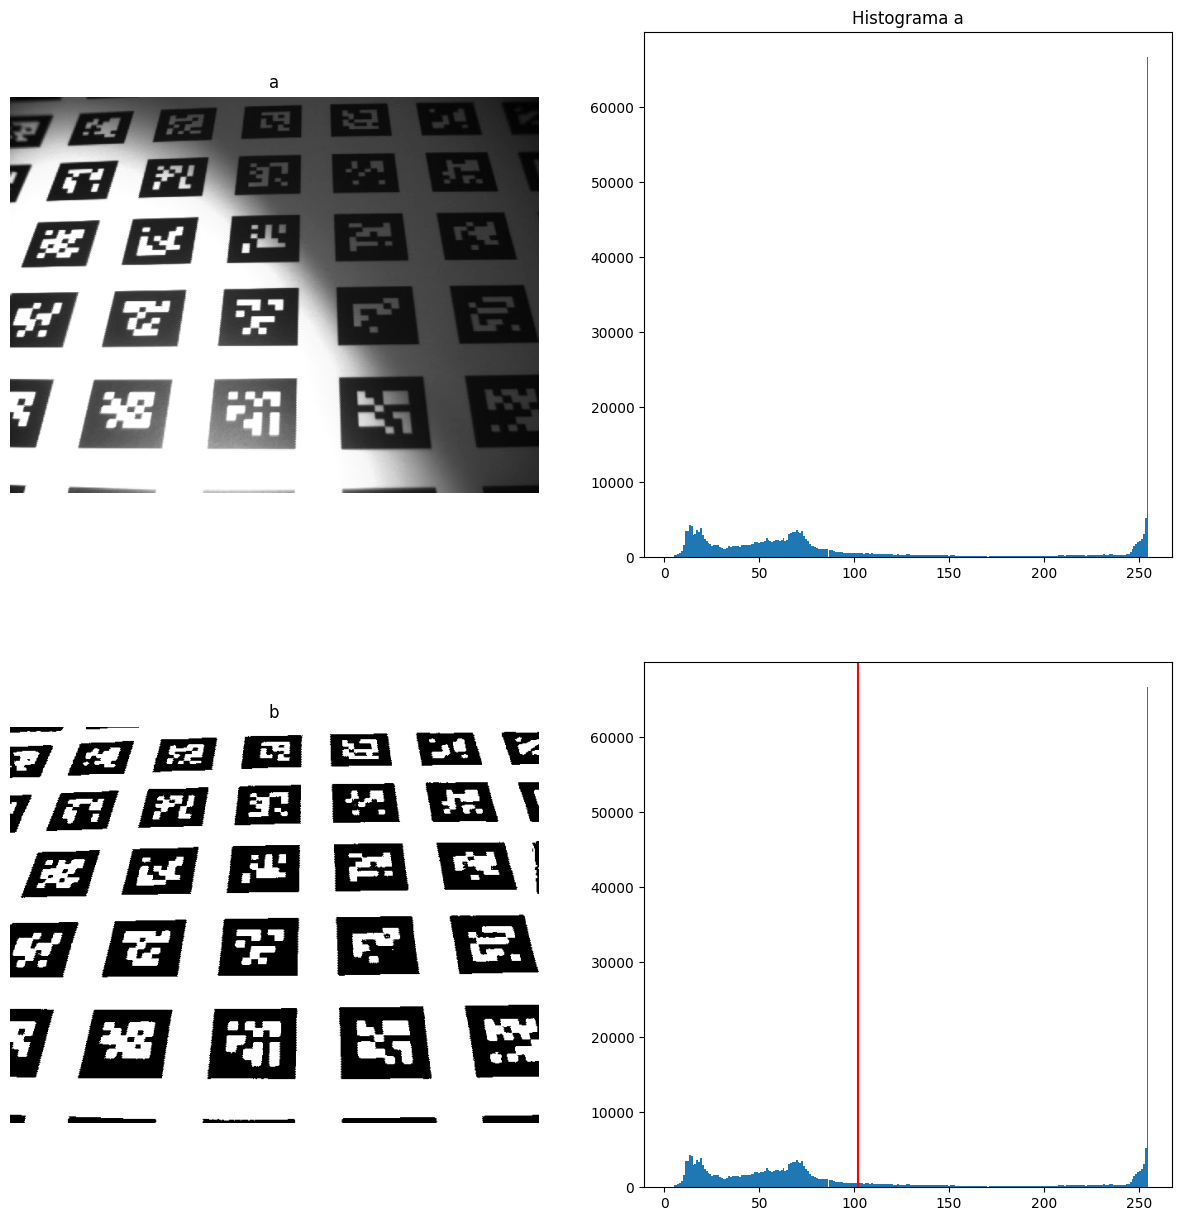

In [28]:
mask_fiducial, t_fiducial = niblack_treshold(img_fiducial, 55, 0.4)

plot_figures_in_line(img_fiducial, mask_fiducial, t_fiducial, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [29]:
_ = info_segment(mask_fiducial)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 102378/307200 ~= 0.33 %


## Imagem __retina__

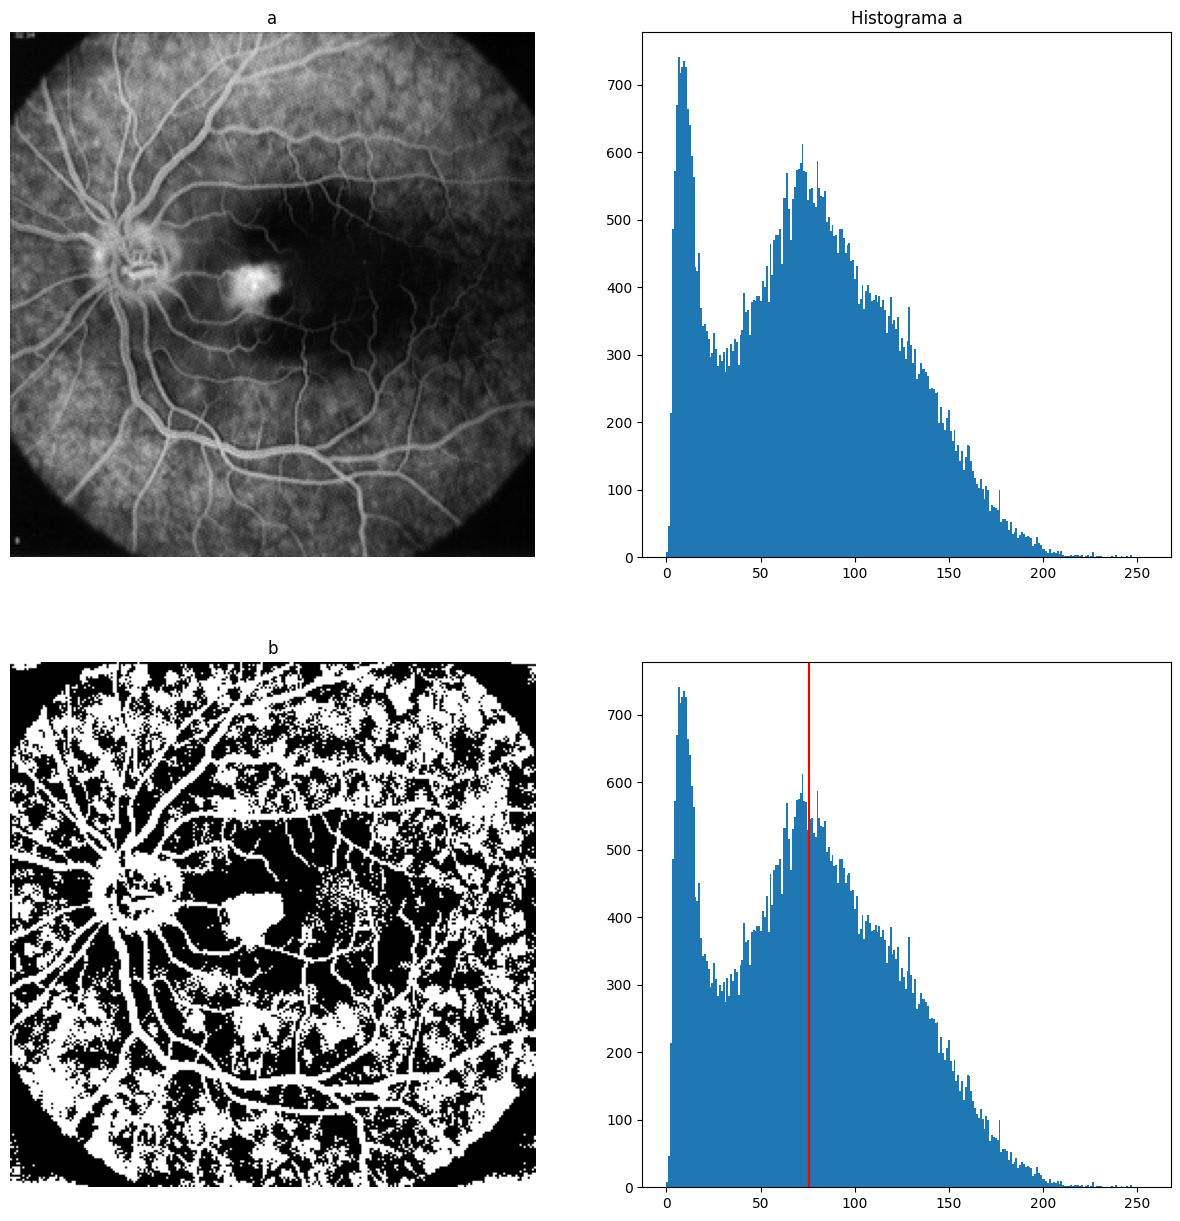

In [30]:
mask_retina, t_retina = niblack_treshold(img_retina, 33, 0.04)

plot_figures_in_line(img_retina, mask_retina, t_retina, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [31]:
_ = info_segment(mask_retina)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 36543/65536 ~= 0.56 %


## Imagem __sonnet__

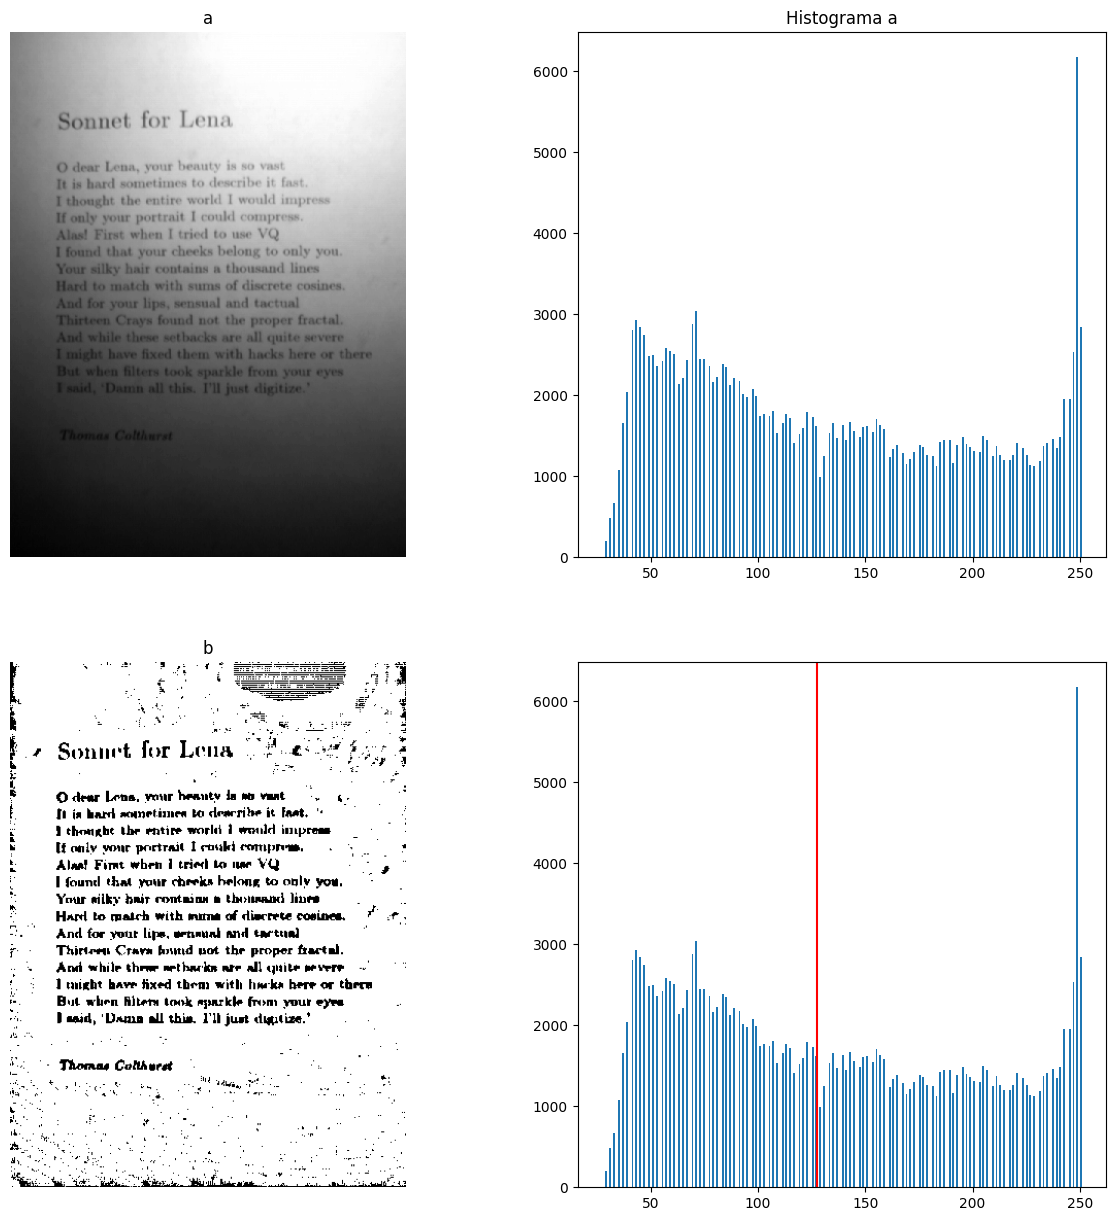

In [32]:
mask_sonnet, t_sonnet = niblack_treshold(img_sonnet, 25, 0.8)

plot_figures_in_line(img_sonnet, mask_sonnet, t_sonnet, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [33]:
_ = info_segment(mask_sonnet)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 20905/195840 ~= 0.11 %


## Imagem __wedge__

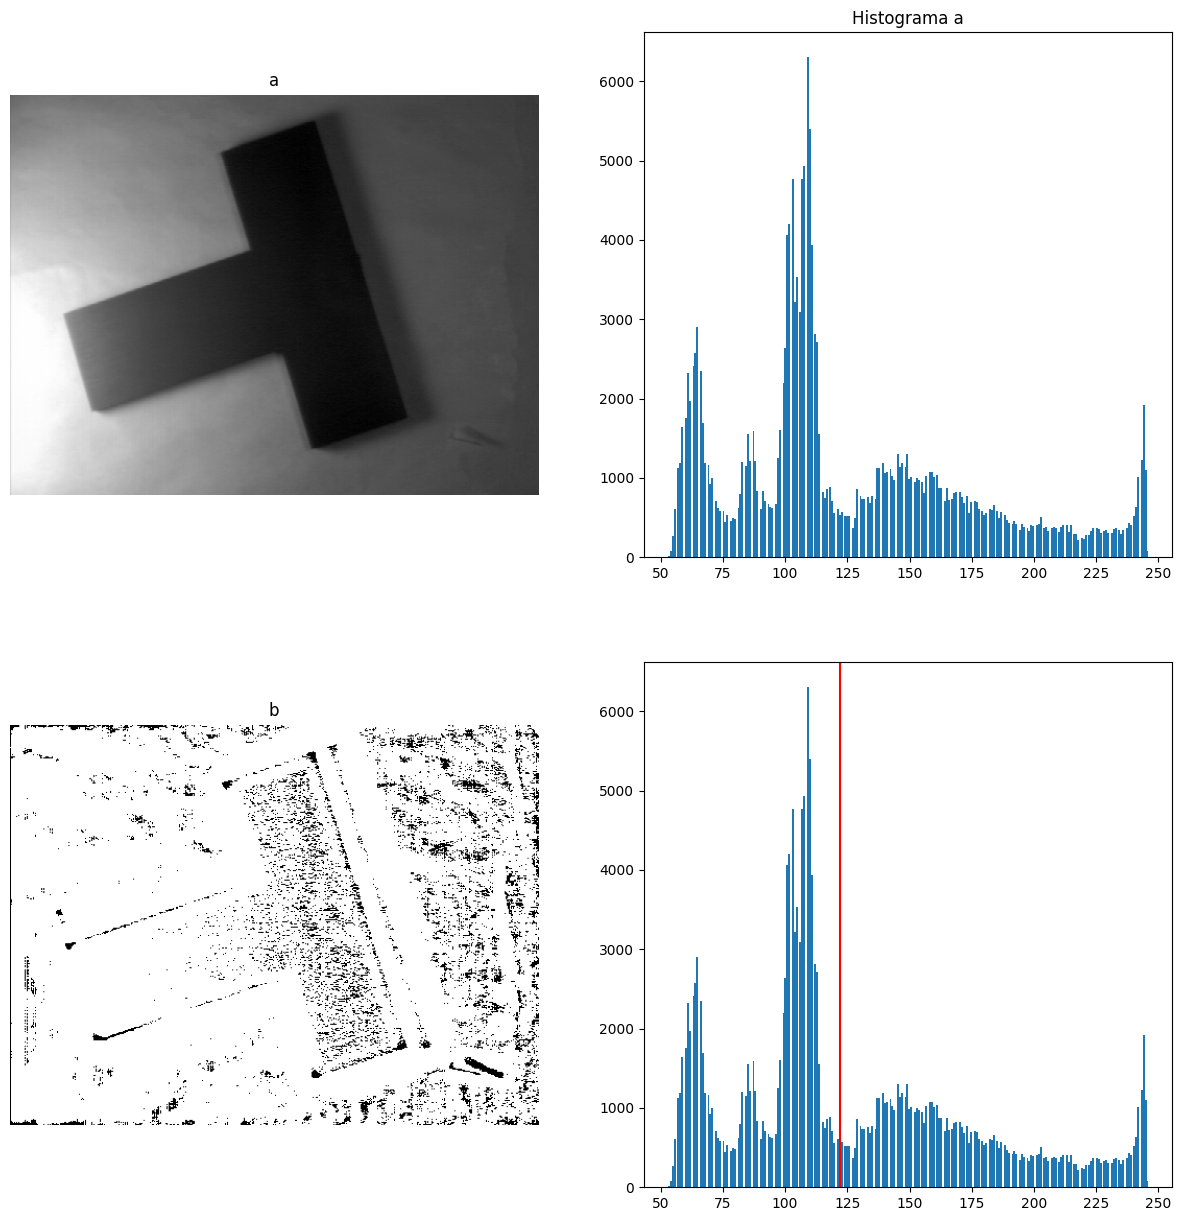

In [34]:
mask_wedge, t_wedge = niblack_treshold(img_wedge, 25, 0.8)

plot_figures_in_line(img_wedge, mask_wedge, t_wedge, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [35]:
_ = info_segment(mask_wedge)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 15437/194688 ~= 0.08 %


# Parte 4 : Método de Sauvola e Pietaksinen
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html

Agora, vamos escrever uma função para facilitar o uso da __sauvola__

In [36]:
from skimage.filters import threshold_sauvola


def sauvola_treshold(img: np.ndarray, window_size: int) -> tuple[np.ndarray, float]:
    """

    :param img:
    :param window_size:
    :return:
    """
    threshold = threshold_sauvola(img, window_size=window_size)
    binary_mask = (img > threshold).astype(img.dtype)
    return binary_mask, threshold.mean()


## Imagem __baboon__

TypeError: Image data of dtype <U22 cannot be converted to float

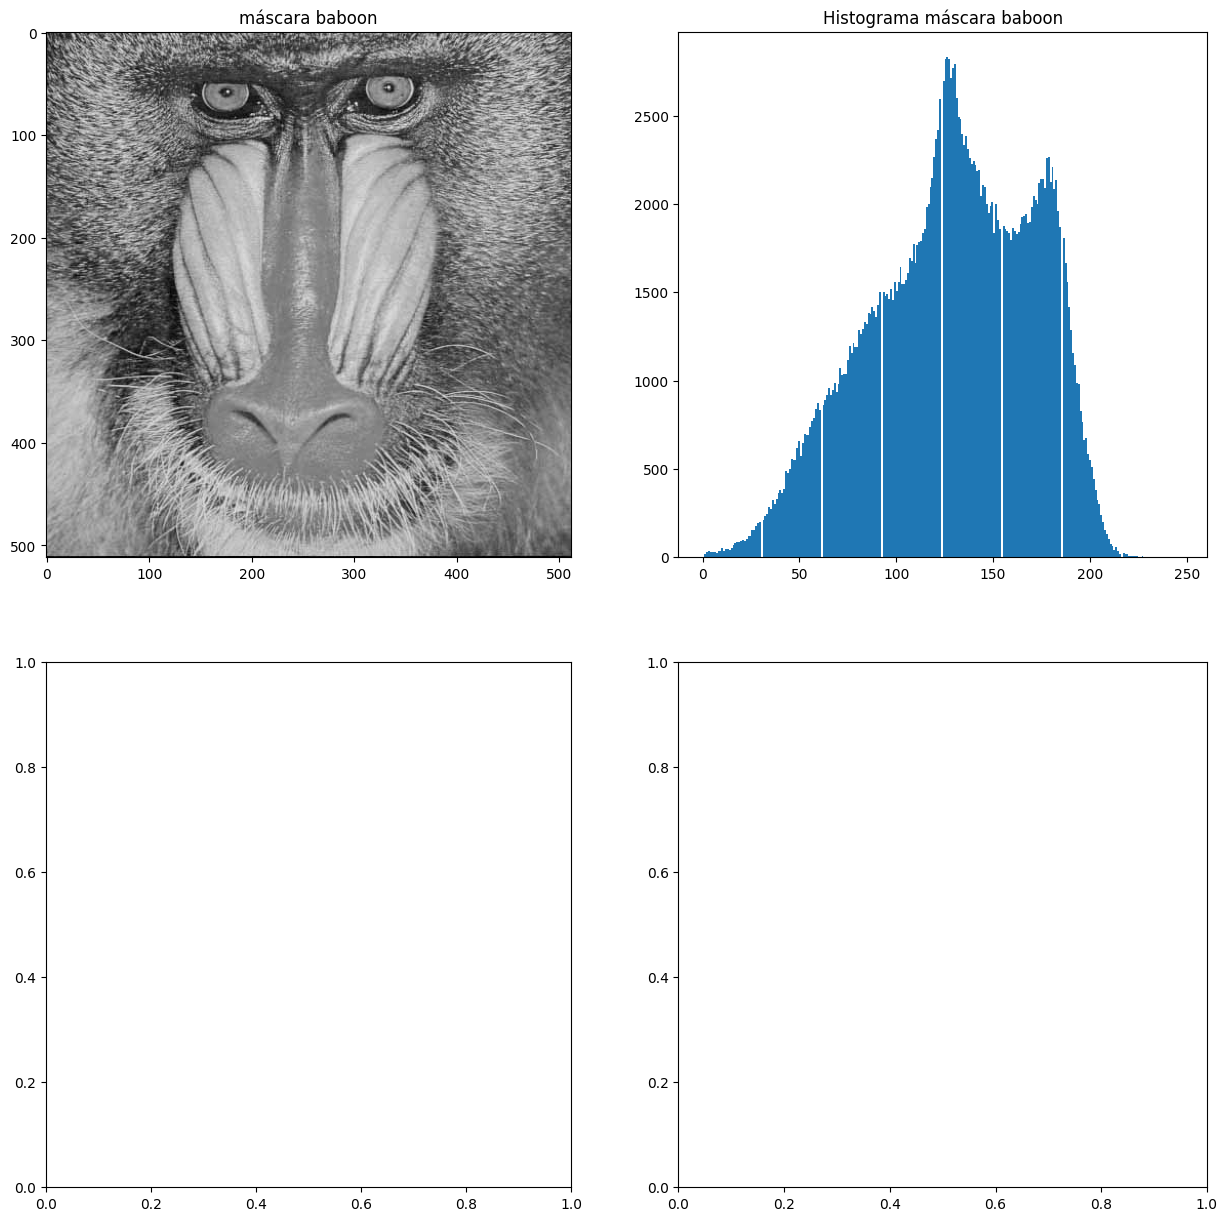

In [37]:
mask_baboon, t_baboon = sauvola_treshold(img_baboon, 25)

plot_figures_in_line(img_baboon, "imagem baboon original", mask_baboon, "máscara baboon",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_baboon.min()))
print("valor máximo da máscara : {}".format(mask_baboon.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_baboon)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __fiducial__

In [ ]:
mask_fiducial = sauvola_treshold(img_fiducial, 25)

plot_figures_in_line(img_fiducial, "imagem fiducial original", mask_fiducial, "máscara fiducial",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_fiducial.min()))
print("valor máximo da máscara : {}".format(mask_fiducial.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_fiducial)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __retina__

In [ ]:
mask_retina = sauvola_treshold(img_retina, 33)

plot_figures_in_line(img_retina, "imagem retina original", mask_retina, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_retina.min()))
print("valor máximo da máscara : {}".format(mask_retina.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_retina)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __sonnet__

In [ ]:
mask_sonnet = sauvola_treshold(img_sonnet, 33)

plot_figures_in_line(img_sonnet, "imagem sonnet original", mask_sonnet, "máscara sonnet",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_sonnet.min()))
print("valor máximo da máscara : {}".format(mask_sonnet.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_sonnet)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __wedge__

In [ ]:
mask_wedge = sauvola_treshold(img_wedge, 33)

plot_figures_in_line(img_wedge, "imagem wedge original", mask_wedge, "máscara wedge",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_wedge.min()))
print("valor máximo da máscara : {}".format(mask_wedge.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_wedge)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

# Parte 5 : Método de Phansalskar, More e Sabale
TODO : Para os outros métodos, o skimage já tem os filtros de média e contraste
https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html#sphx-glr-auto-examples-applications-plot-thresholding-py

In [ ]:
# def more_threshold(img: np.ndarray, k: float, r: float, n: int, p: int, q: int) -> np.ndarray:
#     dx, dy = img.shape[0], img.shape[1]
#     img_mask = np.zeros(shape=(dx, dy), dtype=img.dtype)
#
#     # calculando o raio da visinhança
#     w = int((n - 1) / 2)
#     r *= 255
#
#     for i in range(w + 1, dx):
#         for j in range(w + 1, dy - w):
#             # Extraindo a janela desejada
#             block_img = img[i - w:i + w, j - w:j + w]
#
#             # Calculando a média e o desvido padrão da janela nxn
#             mean_block = block_img.mean()
#             std_block = block_img.std()
#
#             ph = p * np.exp(-q * mean_block)
#             treshold = (mean_block * (1 + ph + k * ((std_block / r) - 1))).astype(img.dtype)
#
#             if (img[i, j] > treshold):
#                 img_mask[i, j] = 0
#             else:
#                 img_mask[i, j] = 1
#
#     return img_mask

def _more_threshold(block_img: np.ndarray, k: float, r: float, p: int, q: int) -> np.ndarray:
    img_mask = np.zeros(shape=block_img.shape, dtype=block_img.dtype)

    r *= 255

    # Calculando a média e o desvido padrão da janela nxn
    mean_block = block_img.mean()
    std_block = block_img.std()

    ph = p * np.exp(-q * mean_block)
    threshold = (mean_block * (1 + ph + k * ((std_block / r) - 1))).astype(block_img.dtype)

    return threshold


def more(img: np.ndarray, k: float, r: float, n: int, p: int, q: int) -> np.ndarray:
    img_mask = np.zeros(shape=img.shape, dtype=img.dtype)
    threshold = generic_filter(img, _more_threshold, n, extra_arguments=(k, r, p, q))
    img_mask = np.where(img > threshold, 1, 0)
    return img_mask, (threshold.mean()).astype(img.dtype)

## Imagem __babbon__

In [ ]:
img_mask, t_baboon = more(img_baboon, 0.25, 0.5, 3, 2, 10)

plot_figures_in_line(img_baboon, img_mask, t_baboon, "a", "b", save_fig="babbon_comparacao.png",
                     save_dir="ResultadosImagens/MetodoGlobal/")

In [ ]:
_, _, _ = info_segment(mask_baboon)

## Parte 6 : Método do contraste

Inicialmente, vamos definir a função __bimodial histogram__ do scikit-image

In [ ]:
from skimage.filters import threshold_minimum


def contrast_threshold(img: np.ndarray) -> tuple[np.ndarray, int]:
    threshold_min = threshold_minimum(img)
    binary_mask = (img > threshold_min).astype(img.dtype)

    return binary_mask, threshold_min


## Aplicando na imagem __babbon__

In [ ]:
mask_baboon, t_baboon = contrast_threshold(img_baboon)

plot_figures_in_line(img_baboon, "imagem retina original", mask_baboon, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
plot_histogrms_in_line(img_baboon, mask_baboon, t_baboon)

In [ ]:
_, _, _ = info_segment(mask_baboon)

## Imagem __fiducial__

In [ ]:
mask_fiducial, t_fiducial = contrast_threshold(img_fiducial)

plot_figures_in_line(img_fiducial, "imagem retina original", mask_fiducial, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
plot_histogrms_in_line(img_fiducial, mask_fiducial, t_fiducial)

In [ ]:
_, _, _ = info_segment(mask_fiducial)

# Parte 7 : Método da média
https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_local

In [ ]:
from skimage.filters import threshold_local


def local_treshold(img: np.ndarray, block_size: int, method: str = "mean", mode="reflect") -> np.ndarray:
    binary_mask = (img > threshold_local(img, block_size=block_size, method=method, mode=mode)).astype(img.dtype)
    return binary_mask

## Imagem __baboon__

In [ ]:
mask_baboon = local_treshold(img_baboon, block_size=55, method="mean", mode="reflect")

plot_figures_in_line(img_baboon, "imagem retina original", mask_baboon, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
_, _, _ = info_segment(mask_baboon)

# Parte 8 : Método da mediana

## Imagem __baboon__

In [ ]:
mask_baboon = local_treshold(img_baboon, block_size=55, method="median", mode="reflect")

plot_figures_in_line(img_baboon, "imagem retina original", mask_baboon, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
_, _, _ = info_segment(mask_baboon)